# SQL joining (merging) tables

## Preparation

For this section you need `chinook.db` database file and working `%sql` magic.  
If you don't have it, please go back to the [previous section](../09_sql/connect_to_database.ipynb) and follow the instructions.  
The following code should not produce any errors:

In [ ]:
%load_ext sql
%sql sqlite:///chinook.db

## `INNER JOIN` - all matching rows 

### Overview

Suppose you have two tables `A` and `B`:
- `A` has columns `a1`, `a2`, and `f`. 
- `B` has columns `b1`, `b2`, and `f`.
- The `A` table links to the `B` table using the foreign key `f`.

The following diagram shows the values of `f` present in both tables.  
Typically, the `INNER JOIN` operation matches and merges rows for the `f` values present in the both tables.

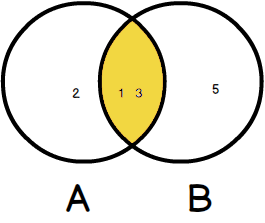

`INNER JOIN` uses the following syntax:

```sql
SELECT a1, a2, b1, b2
  FROM A
  INNER JOIN B ON B.f = A.f
```

or, a simplified syntax when in both tables the name(s) of the column(s) to join on are the same (you may type many comma-separated column names after `f`):

```sql
SELECT a1, a2, b1, b2
  FROM A
  INNER JOIN B USING ( f )
```

### Example (joining two tables)

Let’s take a look at the `tracks` and albums `tables`. 

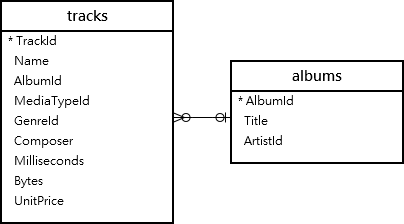

The `tracks` table links to the `albums` table via `AlbumId` column:
- In the tracks table, the `AlbumId` column is a foreign key to the `albums` table. 
- In the `albums` table, the `AlbumId` is the primary key.

In [ ]:
%%sql
SELECT *
  FROM tracks
  INNER JOIN albums ON albums.AlbumId = tracks.AlbumId
  LIMIT 5

Note above, that since the `AlbumId` column is present in both tables it is reported twice (and once the column name gets adjusted to avoid identical repetition).

With the `USING` notation the `AlbumId` column is not unnecesarily repeated:

In [ ]:
%%sql
SELECT *
  FROM tracks
  INNER JOIN albums USING ( AlbumId )
  LIMIT 5

### Example (joining three tables with `AS`-renamed columns and renamed tables)

Tables: `tracks`, `albums` and `artists` are related as follows:
- One track belongs to zero/one album and one album have (m)any tracks. The `tracks` table associated with the `albums` table via `AlbumId` foreign key column.
- One album belongs to exactly one artist and one artist has (m)any albums. The `albums` table links to the `artists` table via `ArtistId` foreign key column.

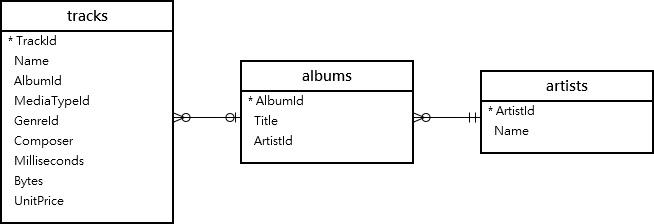


In [ ]:
%%sql
SELECT 
    tcs.TrackId,
    tcs.Name AS Track,
    als.Title AS Album,
    ars.Name AS Artist
  FROM tracks tcs
  INNER JOIN albums als ON als.AlbumId = tcs.AlbumId
  INNER JOIN artists ars ON ars.ArtistId = als.ArtistId
  LIMIT 5

## `LEFT JOIN` - all left rows with and without matches to the right rows

### Overview

The `LEFT JOIN` operation returns each row from the left side table independently whether a matching row is found or not: 
- When a match if found then its columns are merged in the result, separately for each matching row of the right table.
- When no match is found the columns corresponding to the right table are filled with `NULL`.

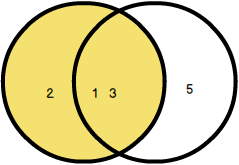

Summarizing:
- You will use `INNER JOIN` when you want to return only records having pair on both sides
- You will use `LEFT JOIN` when you need all records from the left table, no matter if they have pair in the right table or not.

### Example (trial)

In [ ]:
%%sql
SELECT ArtistId, Name, COUNT(AlbumId) AS AlbumsNum FROM artists
  LEFT JOIN albums USING (ArtistId)
  GROUP BY ArtistId
  ORDER BY AlbumsNum

### Example (joining to count)

Let's consider the goal of counting the number of albums for each artist.  
Note, that there might be some artists with no albums and the count for them should be zero.

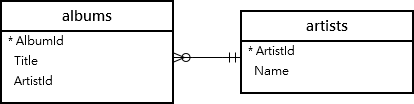

Let's start by `LEFT JOIN` of `artists` and `albums`.  
Then, all artists should be there, possibly with `NULL` albums.

In [ ]:
%%sql
SELECT *
  FROM artists
  LEFT JOIN albums USING (ArtistId)
  LIMIT 5

Now, let's add counting when `GROUP`ped `BY` `ArtistId`.  
*Note:* the `COUNT` is done for the `AlbumId` column, so `NULL` entries possibly obtained from `LEFT JOIN` give proper zero counts.

In [ ]:
%%sql
SELECT ArtistId, Name, COUNT(AlbumId)
  FROM artists
  LEFT JOIN albums USING (ArtistId)
  GROUP BY ArtistId
  LIMIT 5

Let's rename the columns:

In [ ]:
%%sql
SELECT ArtistId, Name AS ArtistName, COUNT(AlbumId) AS AlbumsNum
  FROM artists
  LEFT JOIN albums USING (ArtistId)
  GROUP BY ArtistId
  LIMIT 5

### Example - `CREATE TEMP TABLE` stores a table temporarily

Modify the last code with an extra line(s) at the top and remove the `LIMIT` part:

In [ ]:
%%sql
DROP TABLE IF EXISTS counttab; --- not really needed, only for multiple execution
CREATE TEMP TABLE counttab AS
    SELECT ArtistId, Name AS ArtistName, COUNT(AlbumId) AS AlbumsNum
      FROM artists
      LEFT JOIN albums USING (ArtistId)
      GROUP BY ArtistId

Now, the resulting table is stored as a new (temporary) table `counttab`.

It is easy now to demonstrate some smallest counts (artists with zero counts are there):

In [ ]:
%sql SELECT * FROM counttab ORDER BY AlbumsNum ASC LIMIT 5

In [ ]:
%sql SELECT * FROM counttab ORDER BY AlbumsNum DESC LIMIT 5

## `RIGHT JOIN` - all right rows with and without matches to the left rows

`RIGHT JOIN` is equivalent to the `LEFT JOIN` with swapped left and right tables.

`RIGHT JOIN` is currently not supported by SQLite, so no example here.

## `FULL OUTER JOIN` - all matching rows paired and all non-matching with `NULL`s

The result set of the full outer join has `NULL` values for every column of the table that does not have a matching row in the other table. For the all pairs of matching rows, the `FULL OUTER JOIN` produces a single row with values from columns of the rows in both tables.

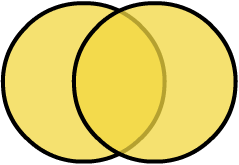

`FULL OUTER JOIN` is currently not supported by SQLLite, so no example here.

The outcome of `FULL OUTER JOIN` might be obtained by using `UNION ALL`. See [the SQLite tutorial](https://www.sqlitetutorial.net/sqlite-full-outer-join/) for details.